#Carga de bibliotecas y datos

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np

In [ ]:
!pwd
%cd /content/drive/MyDrive/UNAM/9no Semestre/TSP II - Ciencia de datos/DataSets

/content/drive/My Drive/UNAM/9no Semestre/TSP II - Ciencia de datos/DataSets
/content/drive/MyDrive/UNAM/9no Semestre/TSP II - Ciencia de datos/DataSets


## Consideraciones

- A pesar de rentar en la delegación de Coyoacán, se optó utilizar la delagación de Xochimilco, ya que se tienen más localidades para realizar el estudio
- Se modificó el dataset original, para quedarse solamente con las localidades de Xochimilco que tuvieran datos

In [ ]:
df_cdmx = pd.read_csv('inegi_2020_cdmx_x.csv')
df_cdmx.head()

,NOM_MUN,NOM_LOC,POBTOT,POBFEM,POBMAS,PNACENT,P18YM_PB,PEA,PSINDER,PDER_SS,P12YM_SOLT,P12YM_CASA,P12YM_SEPA,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_DES,VIVPAR_UT,PRO_OCUP_C,VPH_PISODT,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_AEASP,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_DRENAJ,VPH_C_SERV,VPH_DSADMA,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ
0,Xochimilco,Tepemimilco,156,83,73,120,24,80,56,100,51,63,15,45,43,45,2,0,1.05,39,13,30,5,8,30,41,35,38,10,42,43,37,42,38,30,21,19,2,12,39,18,22,40,23,5,1,3
1,Xochimilco,Ixotitla,204,99,105,160,41,115,47,157,46,83,30,74,57,73,8,9,1.28,54,34,23,15,14,28,55,1,34,13,46,53,14,47,26,21,4,12,3,4,49,7,12,55,13,6,2,0
2,Xochimilco,Paraje Lila (El Ladrillo),30,18,12,27,5,15,7,23,6,14,3,9,8,9,1,0,1.36,8,6,2,0,4,4,8,0,6,1,7,7,1,7,6,4,4,2,1,3,7,2,1,7,1,0,0,2
3,Xochimilco,Zacapa,10,8,2,10,6,6,10,0,8,2,0,3,3,3,0,0,0.91,3,0,3,0,0,3,3,2,3,2,3,3,3,3,2,1,0,0,0,2,3,3,1,3,3,0,0,0
4,Xochimilco,Barrio San Antonio (Cruz Monte),279,128,151,208,58,134,87,192,76,117,22,80,65,80,9,6,1.32,63,26,39,7,17,41,65,3,54,27,61,59,7,59,46,41,19,19,10,14,62,12,10,60,39,2,4,4


## Para este estudio se usaron las siguientes variables

El peso que se le asigna cada variable varía dependiendo de qué necesidades se satisfacen, entre más básicas sean las necesidades, menos peso tendrá, entre las variables se consideren como "más de lujo" tendrán mayor peso.

- Población nacida en la entidad
- Población de 18 años y más con
educación posbásica
- Población de 12 años y más económicamente activa
- Población con afiliación a servicios de salud
- Total de viviendas
- Total de viviendas habitadas
- Total de viviendas particulares
- Viviendas particulares deshabitadas
- Viviendas particulares de uso tempora
- Promedio de ocupantes por cuarto en viviendas particulares habitadas
- Viviendas particulares habitadas con piso de material diferente de tierra
- Viviendas particulares habitadas con un dormitorio
- Viviendas particulares habitadas con dos dormitorios y más
- Viviendas particulares habitadas con sólo un cuarto
- Viviendas particulares habitadas con dos cuartos
- Viviendas particulares habitadas con 3 cuartos y más
- Viviendas particulares habitadas que disponen de energía eléctrica
- Viviendas particulares habitadas que disponen de agua entubada y se abastecen del servicio público de agua
- Viviendas particulares habitadas que disponen de tinaco
- Viviendas particulares habitadas que disponen de cisterna o aljibe
- Viviendas particulares habitadas que disponen de excusado o sanitario
- Viviendas particulares habitadas que disponen de drenaje
- Viviendas particulares habitadas que disponen de energía eléctrica, agua entubada de la red pública y drenaje
- Viviendas particulares ue disponen de drenaje y sanitario con admisión de agua



#Se le asigna un peso a cada columna del dataframe

In [ ]:
s_PNACENT     =(df_cdmx['PNACENT'])*2
s_P18YM_PB    =(df_cdmx['P18YM_PB'])*5
s_PEA         =(df_cdmx['PEA'])*5 	
s_PDER_SS     =(df_cdmx['PDER_SS'])*5
s_VIVTOT 	    =(df_cdmx['VIVTOT'])*2
s_TVIVHAB 	  =(df_cdmx['TVIVHAB'])*5
s_TVIVPAR     =(df_cdmx['TVIVPAR'])*5	
s_VIVPAR_DES  =(df_cdmx['VIVPAR_DES'])*1	
s_VIVPAR_UT   =(df_cdmx['VIVPAR_UT'])*2
s_VPH_PISODT 	=(df_cdmx['VPH_PISODT'])*3
s_VPH_1DOR 	  =(df_cdmx['VPH_1DOR'])*1
s_VPH_2YMASD 	=(df_cdmx['VPH_2YMASD'])*2
s_VPH_1CUART 	=(df_cdmx['VPH_1CUART'])*1
s_VPH_2CUART 	=(df_cdmx['VPH_2CUART'])*2
s_VPH_3YMASC 	=(df_cdmx['VPH_3YMASC'])*5
s_VPH_C_ELEC 	=(df_cdmx['VPH_C_ELEC'])*2
s_VPH_AEASP 	=(df_cdmx['VPH_AEASP'])*2
s_VPH_TINACO 	=(df_cdmx['VPH_TINACO'])*2
s_VPH_CISTER 	=(df_cdmx['VPH_CISTER'])*2
s_VPH_EXCSA 	=(df_cdmx['VPH_EXCSA'])*2
s_VPH_DRENAJ 	=(df_cdmx['VPH_DRENAJ'])*2
s_VPH_C_SERV 	=(df_cdmx['VPH_C_SERV'])*2
s_VPH_DSADMA 	=(df_cdmx['VPH_DSADMA'])*3
s_VPH_REFRI 	=(df_cdmx['VPH_REFRI'])*4
s_VPH_LAVAD 	=(df_cdmx['VPH_LAVAD'])*6
s_VPH_HMICRO 	=(df_cdmx['VPH_HMICRO'])*5
s_VPH_AUTOM 	=(df_cdmx['VPH_AUTOM'])*7
s_VPH_MOTO 	  =(df_cdmx['VPH_MOTO'])*6
s_VPH_BICI 	  =(df_cdmx['VPH_BICI'])*3
s_VPH_TV 	    =(df_cdmx['VPH_TV'])*4
s_VPH_PC 	    =(df_cdmx['VPH_PC'])*6
s_VPH_TELEF   =(df_cdmx['VPH_TELEF'])*2	
s_VPH_CEL 	  =(df_cdmx['VPH_CEL'])*6
s_VPH_INTER   =(df_cdmx['VPH_INTER'])*7	
s_VPH_STVP 	  =(df_cdmx['VPH_STVP'])*7
s_VPH_SPMVPI  =(df_cdmx['VPH_SPMVPI'])*7
s_VPH_CVJ     =(df_cdmx['VPH_CVJ'])*7

# Creación de un nuevo dataframe, donde sus columnas ya fueron multiplicadas por el peso

Se crea un dataframe, comenzando por la columna s_PNACENT, posteriormente se le agregan las demás columnas

---



In [ ]:
suma_p = pd.DataFrame({'PNACENT':s_PNACENT})
suma_p.head()

,PNACENT
0,240
1,320
2,54
3,20
4,416


In [ ]:
suma_p=suma_p.assign( P18YM_PB=s_P18YM_PB )
suma_p=suma_p.assign(PEA  =s_PEA  )
suma_p=suma_p.assign( PDER_SS=s_PDER_SS )
suma_p=suma_p.assign( VIVTOT=s_VIVTOT )
suma_p=suma_p.assign( TVIVHAB=s_TVIVHAB )
suma_p=suma_p.assign( TVIVPAR=s_TVIVPAR )
suma_p=suma_p.assign( VIVPAR_DES=s_VIVPAR_DES )
suma_p=suma_p.assign( VIVPAR_UT=s_VIVPAR_UT )
suma_p=suma_p.assign( VPH_PISODT=s_VPH_PISODT )
suma_p=suma_p.assign( VPH_1DOR=s_VPH_1DOR )
suma_p=suma_p.assign( VPH_2YMASD=s_VPH_2YMASD)
suma_p=suma_p.assign( VPH_1CUART=s_VPH_1CUART)
suma_p=suma_p.assign( VPH_2CUART=s_VPH_2CUART)
suma_p=suma_p.assign( VPH_3YMASC=s_VPH_3YMASC)
suma_p=suma_p.assign( VPH_C_ELEC=s_VPH_C_ELEC)
suma_p=suma_p.assign( VPH_AEASP=s_VPH_AEASP)
suma_p=suma_p.assign( VPH_TINACO=s_VPH_TINACO)
suma_p=suma_p.assign( VPH_CISTER=s_VPH_CISTER)
suma_p=suma_p.assign( VPH_EXCSA=s_VPH_EXCSA)
suma_p=suma_p.assign( VPH_DRENAJ=s_VPH_DRENAJ)
suma_p=suma_p.assign( VPH_C_SERV=s_VPH_C_SERV)
suma_p=suma_p.assign( VPH_DSADMA=s_VPH_DSADMA)
suma_p=suma_p.assign( VPH_REFRI=s_VPH_REFRI)
suma_p=suma_p.assign( VPH_LAVAD=s_VPH_LAVAD)
suma_p=suma_p.assign( VPH_HMICRO=s_VPH_HMICRO)
suma_p=suma_p.assign( VPH_AUTOM=s_VPH_AUTOM)
suma_p=suma_p.assign( VPH_MOTO=s_VPH_MOTO)
suma_p=suma_p.assign( VPH_BICI=s_VPH_BICI)
suma_p=suma_p.assign( VPH_TV=s_VPH_TV)
suma_p=suma_p.assign( VPH_PC=s_VPH_PC)
suma_p=suma_p.assign( VPH_TELEF=s_VPH_TELEF)
suma_p=suma_p.assign( VPH_CEL=s_VPH_CEL)
suma_p=suma_p.assign( VPH_INTER=s_VPH_INTER)
suma_p=suma_p.assign( VPH_STVP=s_VPH_STVP)
suma_p=suma_p.assign( VPH_SPMVPI =s_VPH_SPMVPI)
suma_p=suma_p.assign( VPH_CVJ=s_VPH_CVJ)


suma_p.head()

# Normalización y operaciones con los datos

In [ ]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
df_mean_norm = mean_norm(suma_p)

df_mean_norm.head()

,PNACENT,P18YM_PB,PEA,PDER_SS,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_DES,VIVPAR_UT,VPH_PISODT,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_AEASP,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_DRENAJ,VPH_C_SERV,VPH_DSADMA,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ
0,0.254712,-0.198635,0.079353,0.239092,0.053174,0.203855,0.073298,-0.319939,-0.515998,0.212274,-0.154822,0.575643,-0.156016,0.001068,0.454921,0.183956,3.469965,0.337474,-0.120220,0.310780,0.259613,1.423748,0.306442,0.492239,0.496782,0.878107,0.593538,-0.252702,0.573337,0.215958,0.843793,0.809030,0.231761,0.630092,0.088512,-0.352304,0.165879
1,0.626046,0.223465,0.485179,0.865977,0.595428,0.547190,0.605796,0.284274,1.510466,0.627030,0.771354,0.236019,0.662431,0.616315,0.366156,0.536144,-0.324328,0.219235,0.064932,0.420367,0.514709,0.121496,0.443911,0.079832,0.107644,-0.392346,0.091199,0.013885,-0.365518,0.487319,-0.133231,0.177592,0.637271,0.056194,0.251918,-0.107223,-0.672248
2,-0.608640,-0.670394,-0.674322,-0.607754,-0.619970,-0.654482,-0.611343,-0.420641,-0.515998,-0.644888,-0.463547,-0.782855,-0.565240,-0.409096,-0.699025,-0.646203,-0.435925,-0.608438,-0.675676,-0.648101,-0.658732,-0.614559,-0.655843,-0.607513,-0.627396,-0.392346,-0.626430,-0.519289,-0.482874,-0.652396,-0.577332,-0.516990,-0.660363,-0.632483,-0.728520,-0.597385,-0.113496
3,-0.766457,-0.645564,-0.778677,-0.860708,-0.732161,-0.777102,-0.725449,-0.521343,-0.515998,-0.783140,-0.728169,-0.734337,-0.565240,-0.819261,-0.743408,-0.771985,-0.212732,-0.697117,-0.613959,-0.757688,-0.760770,-0.501320,-0.765819,-0.744982,-0.757108,-0.691276,-0.769955,-0.785875,-0.600231,-0.760941,-0.488512,-0.516990,-0.768499,-0.517703,-0.728520,-0.597385,-0.672248
4,1.071647,0.645564,0.705484,1.250907,0.707619,0.743382,0.738920,0.384976,0.834978,0.875884,0.418525,1.012304,0.007673,0.923938,0.943129,0.787708,-0.101135,0.810429,0.928974,0.831316,0.667766,-0.274841,0.773838,0.767177,0.972396,0.728642,0.593538,1.879991,0.808051,0.840088,0.310871,0.051304,0.772442,1.548328,-0.401707,0.382939,0.445255


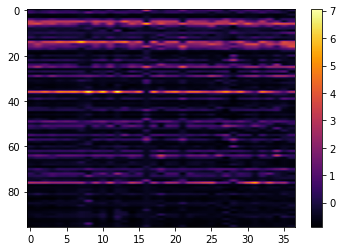

In [ ]:
plt.imshow(df_mean_norm ,aspect='auto',cmap='inferno')
plt.colorbar()

Después de normalizar los datos, se agrega una nueva columna, con la suma de cada renglón

In [ ]:
df_mean_norm['SUM_TOTAL'] = df_mean_norm.sum(axis=1)
df_mean_norm.head()

,PNACENT,P18YM_PB,PEA,PDER_SS,VIVTOT,TVIVHAB,TVIVPAR,VIVPAR_DES,VIVPAR_UT,VPH_PISODT,VPH_1DOR,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_AEASP,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_DRENAJ,VPH_C_SERV,VPH_DSADMA,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,SUM_TOTAL
0,0.254712,-0.198635,0.079353,0.239092,0.053174,0.203855,0.073298,-0.319939,-0.515998,0.212274,-0.154822,0.575643,-0.156016,0.001068,0.454921,0.183956,3.469965,0.337474,-0.120220,0.310780,0.259613,1.423748,0.306442,0.492239,0.496782,0.878107,0.593538,-0.252702,0.573337,0.215958,0.843793,0.809030,0.231761,0.630092,0.088512,-0.352304,0.165879,12.387759
1,0.626046,0.223465,0.485179,0.865977,0.595428,0.547190,0.605796,0.284274,1.510466,0.627030,0.771354,0.236019,0.662431,0.616315,0.366156,0.536144,-0.324328,0.219235,0.064932,0.420367,0.514709,0.121496,0.443911,0.079832,0.107644,-0.392346,0.091199,0.013885,-0.365518,0.487319,-0.133231,0.177592,0.637271,0.056194,0.251918,-0.107223,-0.672248,11.251879
2,-0.608640,-0.670394,-0.674322,-0.607754,-0.619970,-0.654482,-0.611343,-0.420641,-0.515998,-0.644888,-0.463547,-0.782855,-0.565240,-0.409096,-0.699025,-0.646203,-0.435925,-0.608438,-0.675676,-0.648101,-0.658732,-0.614559,-0.655843,-0.607513,-0.627396,-0.392346,-0.626430,-0.519289,-0.482874,-0.652396,-0.577332,-0.516990,-0.660363,-0.632483,-0.728520,-0.597385,-0.113496,-21.626485
3,-0.766457,-0.645564,-0.778677,-0.860708,-0.732161,-0.777102,-0.725449,-0.521343,-0.515998,-0.783140,-0.728169,-0.734337,-0.565240,-0.819261,-0.743408,-0.771985,-0.212732,-0.697117,-0.613959,-0.757688,-0.760770,-0.501320,-0.765819,-0.744982,-0.757108,-0.691276,-0.769955,-0.785875,-0.600231,-0.760941,-0.488512,-0.516990,-0.768499,-0.517703,-0.728520,-0.597385,-0.672248,-25.178627
4,1.071647,0.645564,0.705484,1.250907,0.707619,0.743382,0.738920,0.384976,0.834978,0.875884,0.418525,1.012304,0.007673,0.923938,0.943129,0.787708,-0.101135,0.810429,0.928974,0.831316,0.667766,-0.274841,0.773838,0.767177,0.972396,0.728642,0.593538,1.879991,0.808051,0.840088,0.310871,0.051304,0.772442,1.548328,-0.401707,0.382939,0.445255,25.388300


Se crea un nuevo dataframe a partir de la última columna del dataframe normalizado, es decir, de la columna que contiene la suma total de cada renglón, esto con el fin de poder realizar ciertas operaciones con estos datos

In [ ]:
df_sum_total = pd.DataFrame(df_mean_norm.iloc[:, -1])
df_sum_total

,SUM_TOTAL
0,12.387759
1,11.251879
2,-21.626485
3,-25.178627
4,25.388300
...,...
91,-14.147059
92,-23.027225
93,-25.130529
94,-22.167959


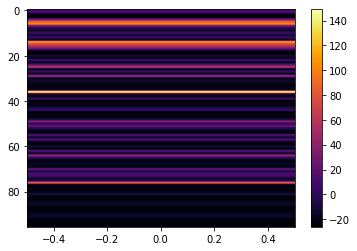

In [ ]:
#Se crea un mapa de calor para poder observar los rangos de puntuación que obtuvo
#cada localidad

plt.imshow(df_sum_total,aspect='auto',cmap='inferno')
plt.colorbar()

In [ ]:
#Con base en los rangos de puntuación, se determina que las localidades con una
#puntuación mayor o igual a 75, son consideradas como de buena calidad para
#vivir

column=df_mean_norm['SUM_TOTAL']
vec_calidad = np.where(column>=75)
vec_calidad

(array([ 5,  6, 14, 36, 76]),)

# Resultados


Los mejores lugares para vivir dentro de Xochimilco son: 

=> Ampliación Chalmita 

=> Tepexomulco 

=> Tipipili 

=> Paraje Zacapa 

=> Zacazontlipac 



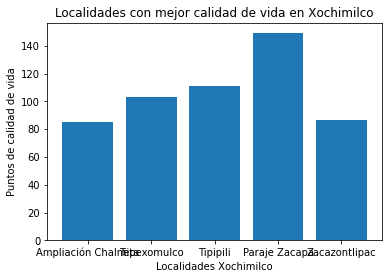

In [ ]:
print("Los mejores lugares para vivir dentro de Xochimilco son: \n")
for i in range (len(vec_calidad[0])):
  print("=>",df_cdmx.iloc[vec_calidad[0][i],1],"\n")


#Se crea un nuevo dataframe, donde sus columnas, son las localidades de Xochimilco
#vs la puntuación total de cada localidad
df_loc_sumt=pd.DataFrame(df_cdmx.iloc[:, 1])
df_loc_sumt['SUM_TOTAL']=df_sum_total

l_x=[]
l_y=[]

for i in range (len(vec_calidad[0])):
  l_y.append(df_loc_sumt.iloc[vec_calidad[0][i],1])

for i in range (len(vec_calidad[0])):
  l_x.append(df_loc_sumt.iloc[vec_calidad[0][i],0])

plt.bar(l_x, l_y)
plt.xlabel('Localidades Xochimilco')
plt.ylabel('Puntos de calidad de vida')
plt.title('Localidades con mejor calidad de vida en Xochimilco')
plt.show()